# **Dataset**

El dataset adquirido se descargó de Kaggle: [RAVDESS Emotional speech audio](https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio)

In [1]:
from pathlib import Path
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:

def average_audio_duration(directories: list[str]):
    for directory in directories:
        dir_path = Path(directory)
        
        if not dir_path.exists() or not dir_path.is_dir():
            print(f"Directory not found: {directory}")
            continue
        
        durations = []
        
        for file in dir_path.iterdir():
            if file.suffix == ".wav":
                try:
                    y, sr = librosa.load(file, sr=None)  # Cargar el audio sin cambiar la frecuencia de muestreo
                    duration = librosa.get_duration(y=y, sr=sr)  # Obtener la duración en segundos
                    durations.append(duration)
                except Exception as e:
                    print(f"Error processing {file.name}: {e}")

        if durations:
            avg_duration = sum(durations) / len(durations)
            print(f"{directory}: {len(durations)} archivos. Duración promedio: {avg_duration:.2f} segundos")
        else:
            print(f"{directory}: No se encontraron archivos de audio.")

In [3]:
directories = [f'./archive/Actor_{i:02d}' for i in range(1, 25)]

In [4]:
average_audio_duration(directories)

./archive/Actor_01: 60 archivos. Duración promedio: 3.75 segundos
./archive/Actor_02: 60 archivos. Duración promedio: 3.79 segundos
./archive/Actor_03: 60 archivos. Duración promedio: 3.76 segundos
./archive/Actor_04: 60 archivos. Duración promedio: 3.63 segundos
./archive/Actor_05: 60 archivos. Duración promedio: 3.74 segundos
./archive/Actor_06: 60 archivos. Duración promedio: 3.79 segundos
./archive/Actor_07: 60 archivos. Duración promedio: 3.75 segundos
./archive/Actor_08: 60 archivos. Duración promedio: 3.73 segundos
./archive/Actor_09: 60 archivos. Duración promedio: 3.49 segundos
./archive/Actor_10: 60 archivos. Duración promedio: 3.75 segundos
./archive/Actor_11: 60 archivos. Duración promedio: 3.44 segundos
./archive/Actor_12: 60 archivos. Duración promedio: 3.75 segundos
./archive/Actor_13: 60 archivos. Duración promedio: 3.33 segundos
./archive/Actor_14: 60 archivos. Duración promedio: 3.68 segundos
./archive/Actor_15: 60 archivos. Duración promedio: 3.50 segundos
./archive/

Por cada actor se cuenta con 60 audios, estos tienen una duración dentro del rango (3, 4) segundos aproximadamente (en total son 24 actores). Cada audio está etiquetado con `0#-0#-0#-0#-0#-0#-##.wav`

Donde cada 0# representa una caracteristica del audio. A continuación, se presenta el orden de las caracteristicas en la etiqueta de cada audio:

1. **Modality** (01 = full-AV, 02 = video-only, 03 = audio-only).

2. **Vocal channel** (01 = speech, 02 = song).

3. **Emotion** (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

4. **Emotional intensity** (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

5. **Statement** (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

6. **Repetition** (01 = 1st repetition, 02 = 2nd repetition).

7. **Actor** (01 to 24. Odd numbered actors are male, even numbered actors are female)


In [5]:
def make_csv(directories: list[str], output_csv="dataset.csv"):

    data = []
    
    for directory in directories:
        
        for filename in os.listdir(directory): # archives inside of the curret directory
            if filename.endswith(".wav"): # if the file is a video with an _

                emotion_id = filename.split("-")[2] # get the emotion id

                data.append({"filename": filename, "emotion_id": emotion_id})

    df = pd.DataFrame(data)
    df.to_csv(output_csv, index=False)
    
    print(f"CSV creado exitosamente: {output_csv}")

In [6]:
make_csv(directories, "dataset.csv") # este csv extrae los nombres de los archivos y los ids de las emociones

CSV creado exitosamente: dataset.csv


In [7]:
data = pd.read_csv("dataset.csv")

In [8]:
data.head()

,filename,emotion_id
0,03-01-01-01-01-01-01.wav,1
1,03-01-01-01-01-02-01.wav,1
2,03-01-01-01-02-01-01.wav,1
3,03-01-01-01-02-02-01.wav,1
4,03-01-02-01-01-01-01.wav,2


In [9]:
unique_emotions = data["emotion_id"].unique()
print(unique_emotions)

[1 2 3 4 5 6 7 8]


Se comprueba que solo existen 8 emociones diferentes en el dataset.

C:\Users\nayel\AppData\Local\Temp\ipykernel_11220\1328610313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=emotion_names, y=emotion_counts.values, palette="coolwarm")


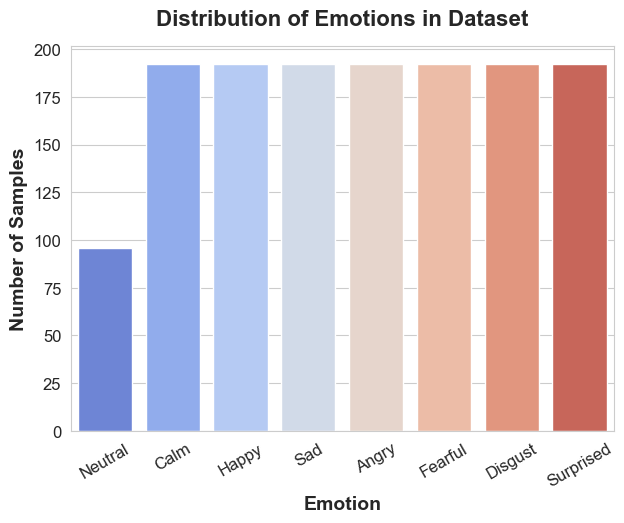

In [10]:
emotion_labels = {
    1: "Neutral", 2: "Calm", 3: "Happy", 4: "Sad",
    5: "Angry", 6: "Fearful", 7: "Disgust", 8: "Surprised"
}

emotion_counts = data["emotion_id"].value_counts().sort_index()

emotion_names = [emotion_labels[eid] for eid in emotion_counts.index]

sns.set_style("whitegrid")
plt.figure(figsize=(7, 5))

ax = sns.barplot(x=emotion_names, y=emotion_counts.values, palette="coolwarm")

plt.xlabel("Emotion", fontsize=14, fontweight="bold")
plt.ylabel("Number of Samples", fontsize=14, fontweight="bold")
plt.title("Distribution of Emotions in Dataset", fontsize=16, fontweight="bold", pad=15)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## **Análisis de espectogramas**

In [ ]:
import random
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import math

In [64]:
df_neutral = data[data["emotion_id"] == 1]
df_happy = data[data["emotion_id"] == 3]
df_angry = data[data["emotion_id"] == 5]
df_surprised = data[data["emotion_id"] == 8]

happy_random_ids = random.sample(df_happy["filename"].tolist(), k=4)
angry_random_ids = random.sample(df_angry["filename"].tolist(), k=4)
surprised_random_ids = random.sample(df_surprised["filename"].tolist(), k=4)
neutral_random_ids = random.sample(df_neutral["filename"].tolist(), k=4)

print(happy_random_ids)
print(angry_random_ids)
print(surprised_random_ids)
print(neutral_random_ids)

['03-01-03-02-02-02-14.wav', '03-01-03-02-02-02-13.wav', '03-01-03-02-02-01-14.wav', '03-01-03-02-02-01-11.wav']
['03-01-05-02-01-02-02.wav', '03-01-05-01-01-02-01.wav', '03-01-05-02-01-02-07.wav', '03-01-05-01-02-02-19.wav']
['03-01-08-01-01-02-21.wav', '03-01-08-02-02-02-13.wav', '03-01-08-01-02-01-11.wav', '03-01-08-01-02-01-13.wav']
['03-01-01-01-02-01-01.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-02-01-07.wav', '03-01-01-01-02-01-20.wav']


In [72]:
def generate_paths(full_path:str, ids:list[str]):
    
    paths = []
    
    for id in ids:
        
        i = id.split("-")[-1][:2]
        #print (i)

        paths.append(f"{full_path}{i}/{id}")
    
    return paths


def plot_multiple_mel_spectrograms(audio_paths: list[str], emotion:str, n_mels=64):
    """
    Plotea múltiples gráficos de MFCC a partir de archivos de audio.
    
    Parámetros:
    - audio_paths: lista de rutas de archivos de audio.
    - n_mels: número de bandas 

    """
    full_path = "C:/Users/nayel/Desktop/utec/2025-0/machine-learning/emotion-recognition-in-speech/archive/Actor_"
    audio_paths = generate_paths(full_path, audio_paths)
    
    num_audios = len(audio_paths)
    cols = 2  
    rows = math.ceil(num_audios / cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = np.array(axes).reshape(rows, cols)

    fig.suptitle(f"Espectrogramas de Mel para analizar la emoción: {emotion}", fontsize=16, fontweight="bold")
    
    for i, audio_path in enumerate(audio_paths):
        row, col = divmod(i, cols) 
        y, sr = librosa.load(audio_path, sr=None)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)

        img = librosa.display.specshow(S_db, x_axis="time", sr=sr, cmap="viridis", ax=axes[row, col])
        axes[row, col].set_title(f"MFCC - {audio_path.split('/')[-1]}")
        fig.colorbar(img, ax=axes[row, col], format="%+2.0f dB")
    
    for i in range(num_audios, rows * cols):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

In [73]:
paths = generate_paths("C:/Users/nayel/Desktop/utec/2025-0/machine-learning/emotion-recognition-in-speech/archive/Actor_", happy_random_ids)

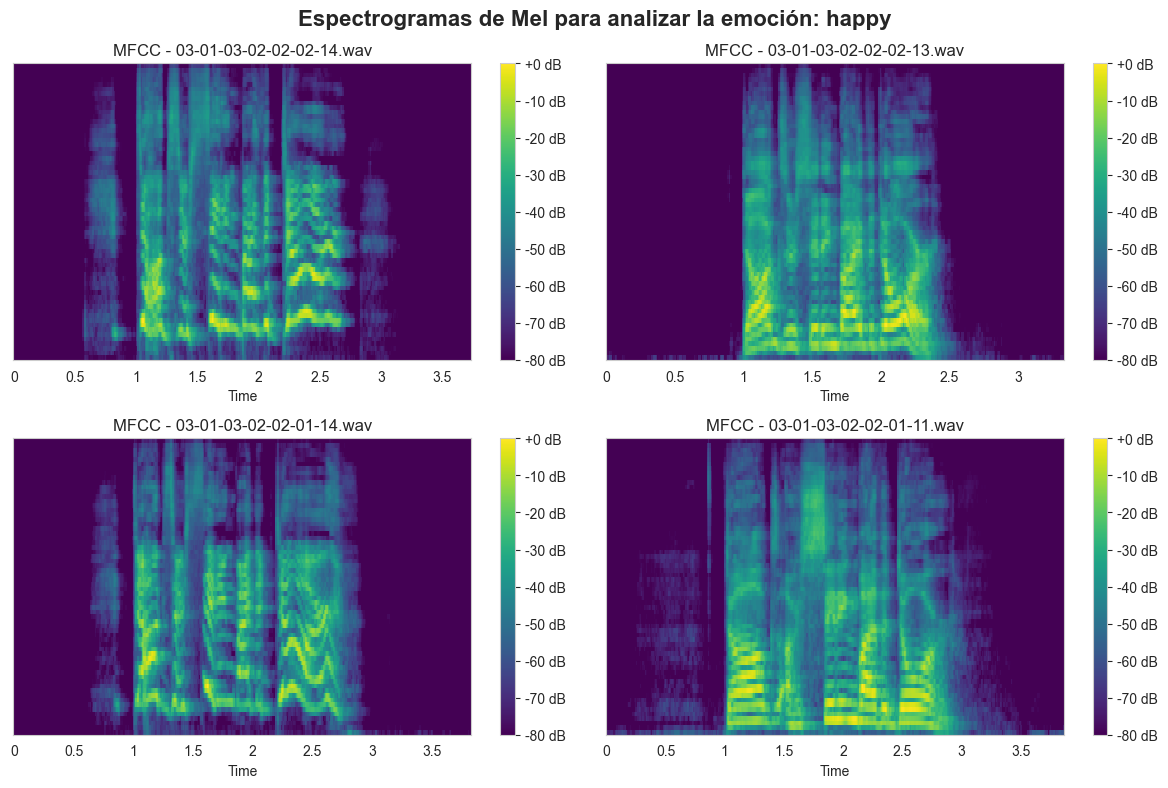

In [74]:
plot_multiple_mel_spectrograms(happy_random_ids, "happy")

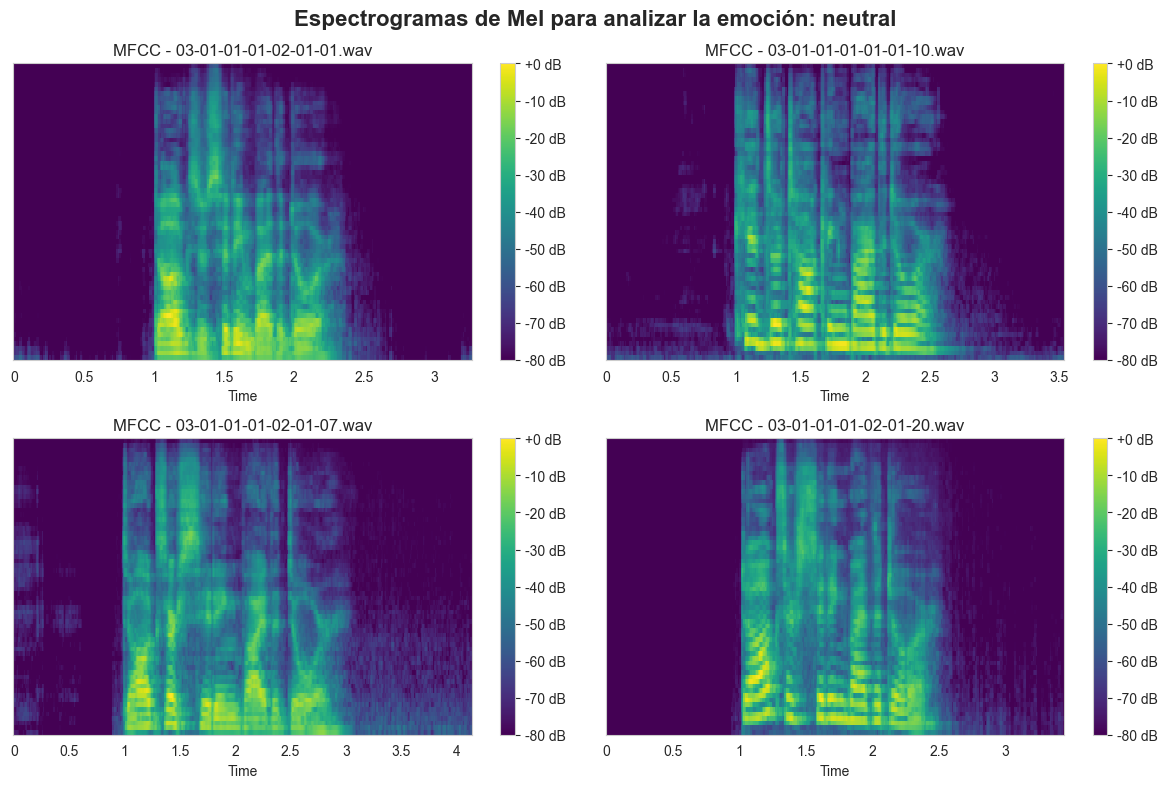

In [75]:
plot_multiple_mel_spectrograms(neutral_random_ids, "neutral")

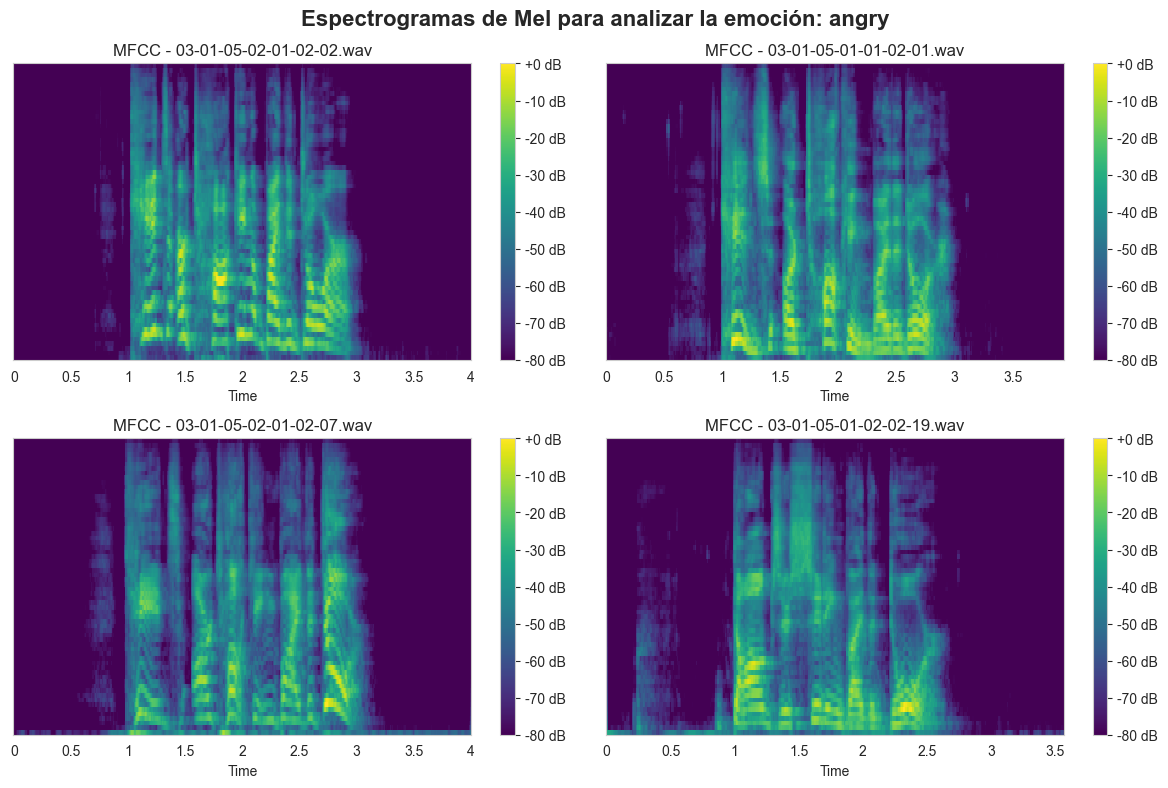

In [76]:
plot_multiple_mel_spectrograms(angry_random_ids, "angry")

Al analizar los espectrogramas de las emociones *Happy*, *Neutral* y *Angry*, se observan diferencias significativas en la distribución de la energía en las frecuencias a lo largo del tiempo. 

El espectrograma de **Happy** muestra una mayor intensidad en las frecuencias medias y altas, con transiciones suaves, reflejando un tono enérgico durante casi todo e tiempo que dura el audio. En contraste, **Neutral** presenta una distribución de energía más uniforme a lo largo del tiempo, con una menor presencia de frecuencias altas, lo que sugiere una entonación estable y sin grandes fluctuaciones. Por otro lado, **Angry** tiene un espectrograma con mayor energía en las frecuencias bajas y medias, con transiciones más bruscas y patrones irregulares, esto es característico de una voz con mayor tensión y agresividad. 

Estas diferencias en la energía y el patrón espectral permiten identificar las emociones en el habla de manera visual.